In [1]:
tissues = ["kidney", "testis"]
reps = ["rep1", "rep2"]
marks = ["h3k4","h3k36"]
prdm9s = ['PRDM9-A','PRDM9-B','PRDM9-C','PRDM9-D','PRDM9-E','PRDM9-F','PRDM9-G','PRDM9-H','PRDM9-I','PRDM9-J','PRDM9-K','PRDM9-L','PRDM9-M','PRDM9-N']

data = pd.DataFrame()

for t in tissues:
    for r in reps:
        for m in marks:
            exp = f"{t}-{r}-{m}"
            df = pd.read_csv(f"../peaks/{exp}.bed", sep="\t", header=None)
            df.columns = ["chrom", "start", "end", "fold_change"]
            df["exp"] = exp
            data = pd.concat([data, df])

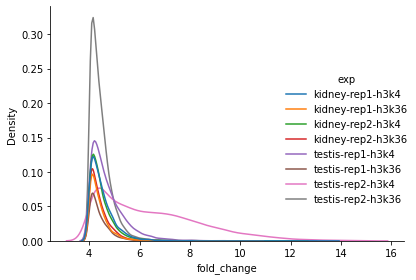

In [22]:
sns.displot(data=data[data.fold_change<15], x="fold_change", kind="kde", hue="exp", height=4)
plt.tight_layout()
plt.savefig("pdfs/fold_change_distributions.pdf")

In [2]:
data = pd.DataFrame()
for t in tissues:
    for prdm9 in prdm9s:
        print(t, prdm9)
        df = pd.read_csv(f"../overlap/{prdm9}.{t}.3way.tab", sep="\t", header=None, engine="pyarrow")
        df.columns = ["chrom", "start", "end", "crap", "allele", "dist_k4", "dist_k36", "rep"]
        df["tissue"] = t
        df["prdm9"] = prdm9
        data = pd.concat([data, df])
    

kidney PRDM9-A
kidney PRDM9-B
kidney PRDM9-C
kidney PRDM9-D
kidney PRDM9-E
kidney PRDM9-F
kidney PRDM9-G
kidney PRDM9-H
kidney PRDM9-I
kidney PRDM9-J
kidney PRDM9-K
kidney PRDM9-L
kidney PRDM9-M
kidney PRDM9-N
testis PRDM9-A
testis PRDM9-B
testis PRDM9-C
testis PRDM9-D
testis PRDM9-E
testis PRDM9-F
testis PRDM9-G
testis PRDM9-H
testis PRDM9-I
testis PRDM9-J
testis PRDM9-K
testis PRDM9-L
testis PRDM9-M
testis PRDM9-N


In [3]:
close = 25

data_list = [[len(df.query(f"dist_k4 < {close} & dist_k36 < {close}")), 
              len(df),
              tissue,
              prdm9,
              rep]
             for (tissue,prdm9,rep),df in data.groupby(["tissue","prdm9","rep"])]

results = pd.DataFrame(data_list)
results.columns = ["hits", "total", "tissue", "prdm9", "rep"]
results["frac_overlap"] = results.hits / results.total

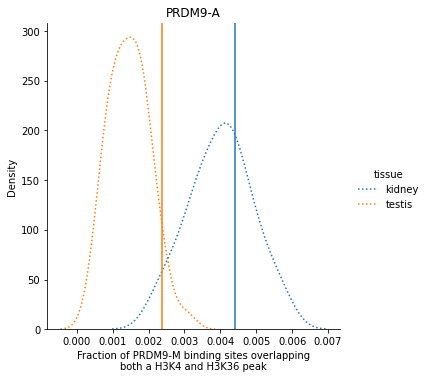

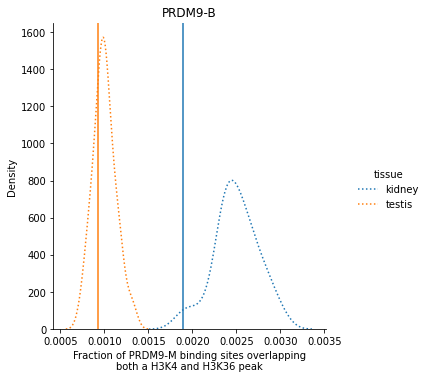

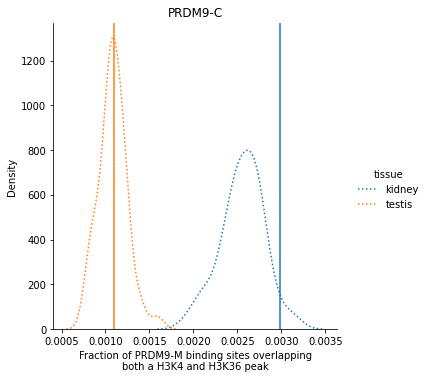

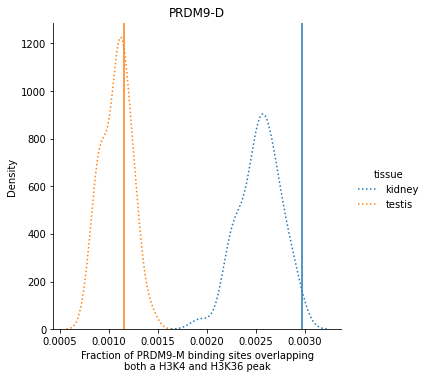

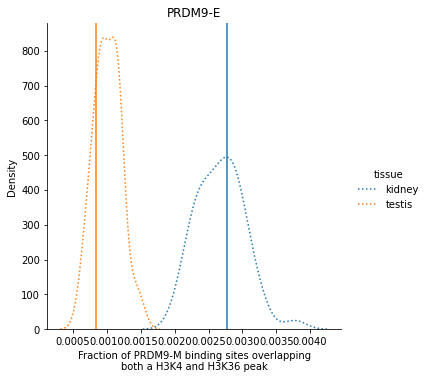

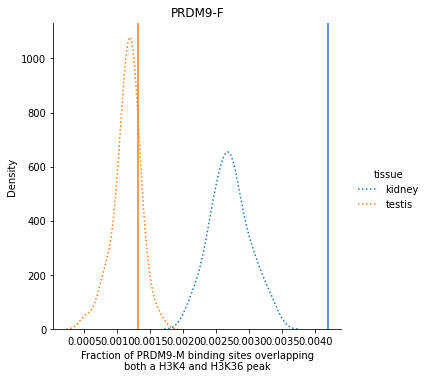

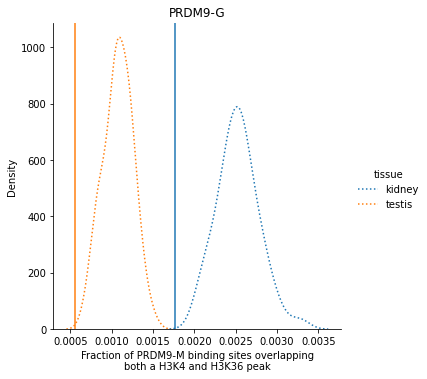

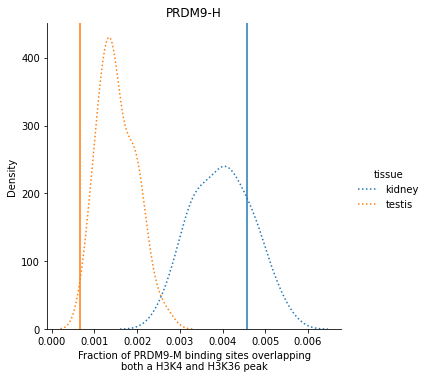

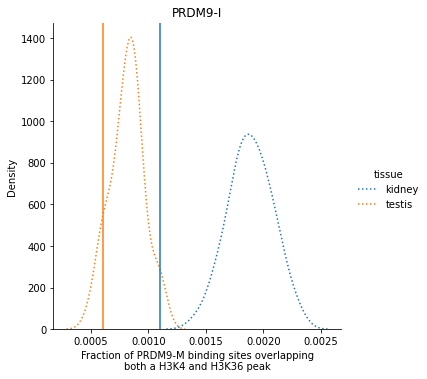

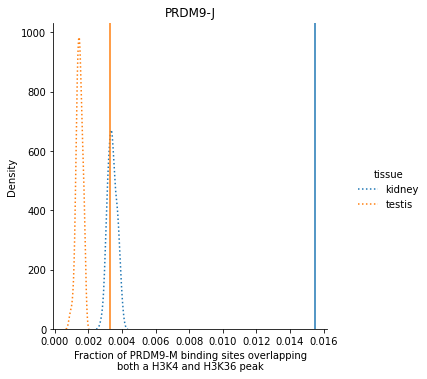

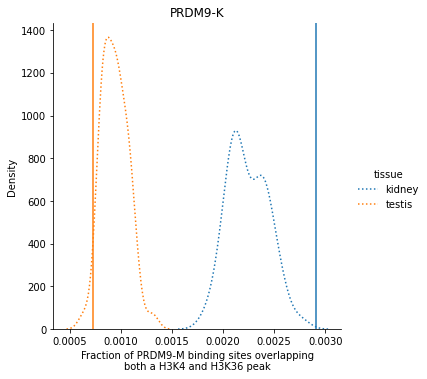

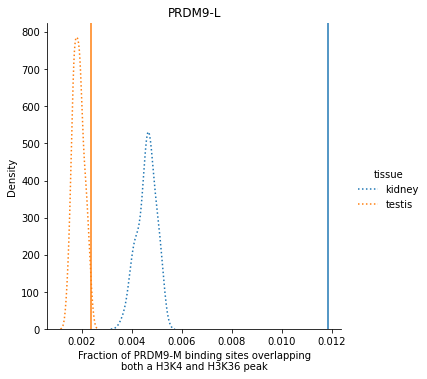

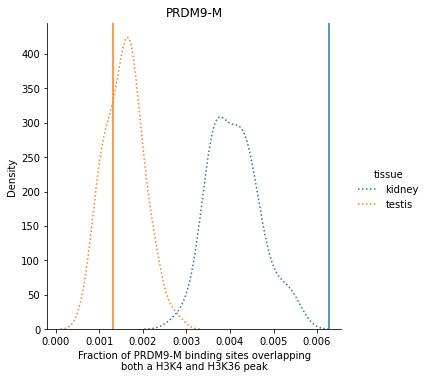

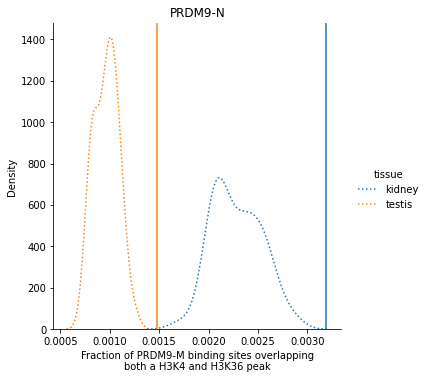

In [5]:
for prdm9, res in results.groupby("prdm9"):
    og = res[res.rep==0]
    shuf = res[res.rep!=0]
    sns.displot(data=shuf, x="frac_overlap", 
                hue="tissue", 
                kind="kde", 
                linestyle="dotted", 
                height=5)
    for i,t in enumerate(tissues):
        v = og[og.tissue==t].frac_overlap.values[0]
        plt.axvline(x=v, color=f"C{i}")
    plt.title(prdm9)
    plt.xlabel("Fraction of PRDM9-M binding sites overlapping\nboth a H3K4 and H3K36 peak")

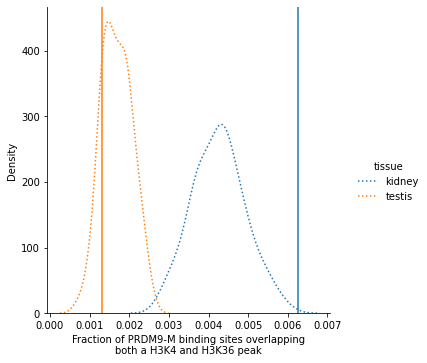

In [82]:
og = results[results.rep==0]
shuf = results[results.rep!=0]
sns.displot(data=shuf, x="frac_overlap", 
            hue="tissue", 
            kind="kde", 
            linestyle="dotted", 
            height=5)
for i,t in enumerate(tissues):
    v = og[og.tissue==t].frac_overlap.values[0]
    plt.axvline(x=v, color=f"C{i}")

plt.xlabel("Fraction of PRDM9-M binding sites overlapping\nboth a H3K4 and H3K36 peak")
#plt.tight_layout()
#plt.savefig("pdfs/double_peak_overlap.pdf")